In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [105]:
def plot_distribution(column_name):
    """
    This function takes in a column name and creates a distribution plot for that column.
    """
    plt.figure(figsize=(10, 8))
    plt.style.use('fivethirtyeight')
    plt.title(f"Distribution of Impressions {column_name}")
    sns.histplot(data[column_name])
    plt.show()


In [106]:
# Load the data from a CSV file
data = pd.read_csv("Instagram_dataset.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves   
0         3920       2586           1028           619          56     98  \
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows   
0         9       5    162              35        2  \
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption   
0  Here are some of the most important data visua...  \
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [107]:
# Check for missing values in the data
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [108]:
# Drop rows with missing values
data = data.dropna() 

In [109]:
# Display information about the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


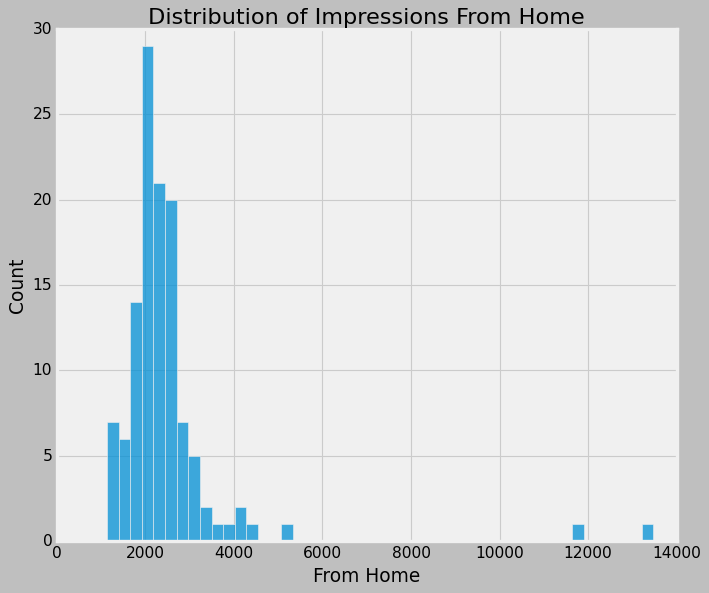

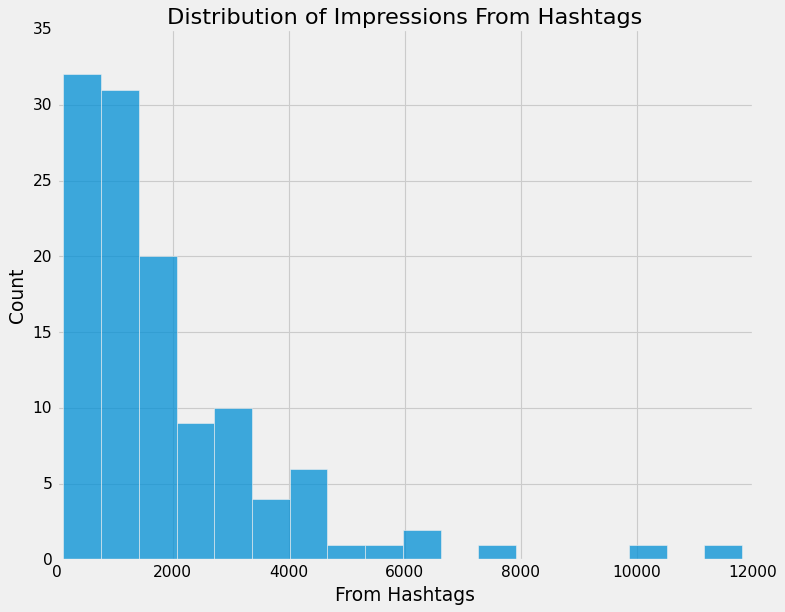

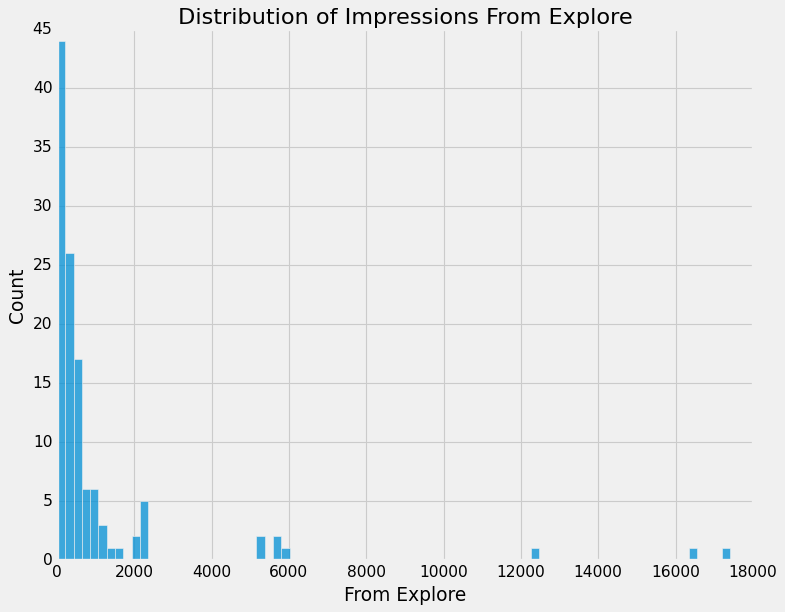

In [110]:
# Plot distributions using the plot_distribution function
plot_distribution('From Home')
plot_distribution('From Hashtags')
plot_distribution('From Explore')

In [111]:
# Calculate the total number of impressions from each source
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

In [112]:
# Create a pie chart showing the distribution of impressions by source
labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]
fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.4)
fig.show()

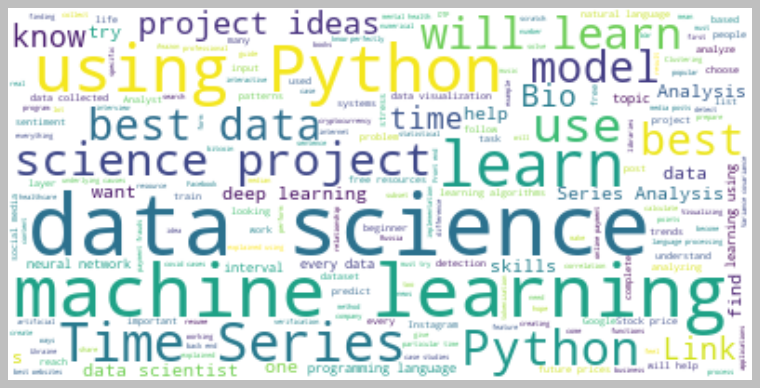

In [113]:
# Generate a word cloud from the captions
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [114]:
# Create scatter plots showing the relationship between impressions and other variables
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [115]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [116]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [117]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [118]:
# Remove non-numeric columns from the data frame
data_numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation between the remaining columns
correlation = data_numeric.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [119]:
# Calculate the conversion rate (followers gained per profile visit)
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [120]:
# Create a scatter plot showing the relationship between profile visits and followers gained
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [121]:
# Split the data into training and test sets for model training
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=38)

In [122]:
# Train a PassiveAggressiveRegressor model on the training data
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)

PassiveAggressiveRegressor()

In [123]:
# Evaluate the model on the test data
model.score(xtest, ytest)

0.8857944831728475

In [124]:
# Make a prediction using the trained model 
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[325.0, 264.0, 6.0, 12.0, 197.0, 72.0]])
model.predict(features)

array([11882.13808153])